<a href="https://colab.research.google.com/github/Nusrahkhan/Iris-Flower-Classification/blob/main/iris_flower.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing**

In [1]:
import pandas as pd

In [12]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("arshid/iris-flower-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/arshid/iris-flower-dataset/versions/1


In [13]:
df = pd.read_csv(path + "/IRIS.csv")

In [14]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# **Checking** **For** **Null** **Values**

In [16]:
df.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


# **Label** **Encoding**

In [106]:
print(df['species'].unique())

[0 1 2]


In [107]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])
print(df['species'].unique())

[0 1 2]


In [108]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# **Making** **Box** **Plot** **For** **Identifying** **Outliers**

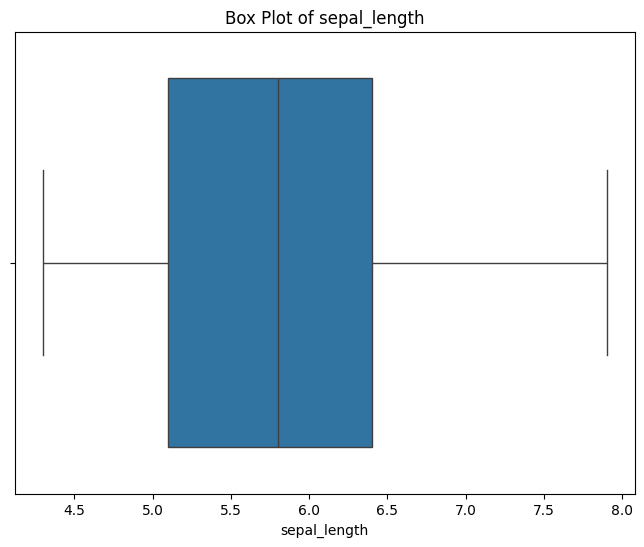

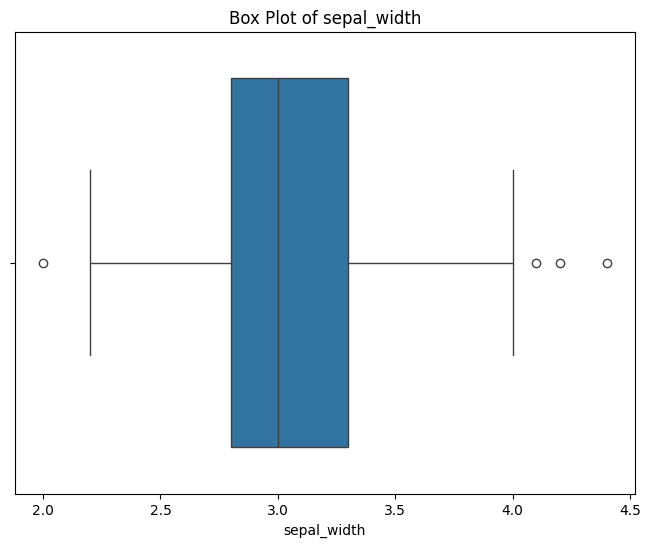

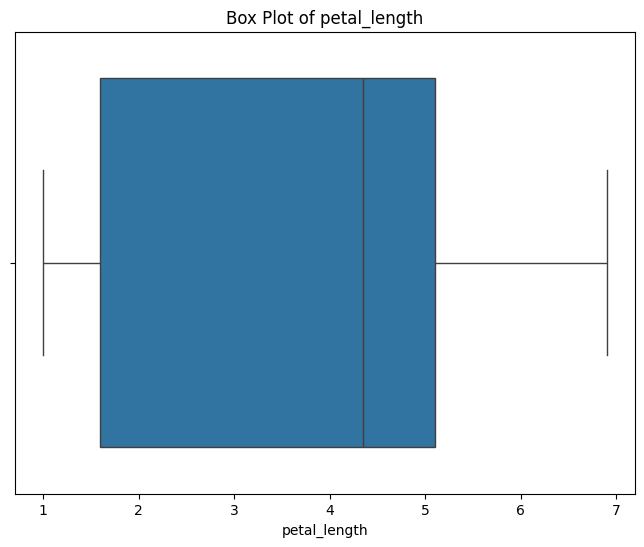

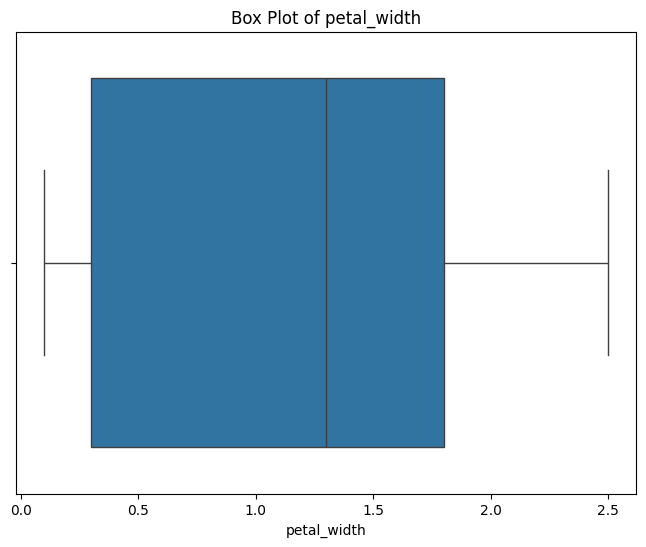

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame from the previous code

for col in df.columns[:-1]:  # Exclude the last column (species), as it's categorical
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

vif_data

,feature,VIF
0,sepal_length,264.745711
1,sepal_width,97.111606
2,petal_length,173.968965
3,petal_width,55.488689


In [44]:
df['petal_ratio'] = df['petal_width'] / df['petal_length']

In [105]:
# Example if X is not defined:
X = df.drop('species', axis=1)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

vif_data

,feature,VIF
0,sepal_length,264.745711
1,sepal_width,97.111606
2,petal_length,173.968965
3,petal_width,55.488689


# **Make** **X** **and** **Y** **variables**

In [86]:
X = df.drop('species', axis=1)
y = df['species']

In [87]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# **Splitting** **Data**

In [88]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Training**

## **Random** **Forest**

In [103]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42) # You can adjust n_estimators
rf_model.fit(X_train, y_train)

# Make predictions
rf_y_pred = rf_model.predict(X_test)

# Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test, rf_y_pred))
print(classification_report(y_test, rf_y_pred))
print(accuracy_score(y_test, rf_y_pred))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

1.0


## **Cross**-**Validation**

In [102]:
from sklearn.model_selection import KFold

# Assuming 'model' is your trained model (e.g., rf_model) and 'X' and 'y' are your features and target variable.
# Example using k-fold cross-validation with k=5
kf = KFold(n_splits=5, shuffle=True, random_state=42) # Initialize KFold
scores = cross_val_score(rf_model, X, y, cv=kf)

print("Cross-validation scores:", scores)
print("Average cross-validation score:", scores.mean())

Cross-validation scores: [1.         0.96666667 0.93333333 0.93333333 0.96666667]
Average cross-validation score: 0.9600000000000002


# **Viualisation**

<Axes: xlabel='species', ylabel='Count'>

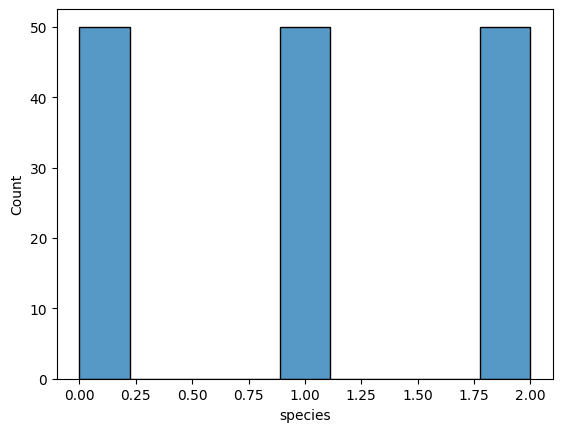

In [109]:
sns.histplot(df['species'])

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

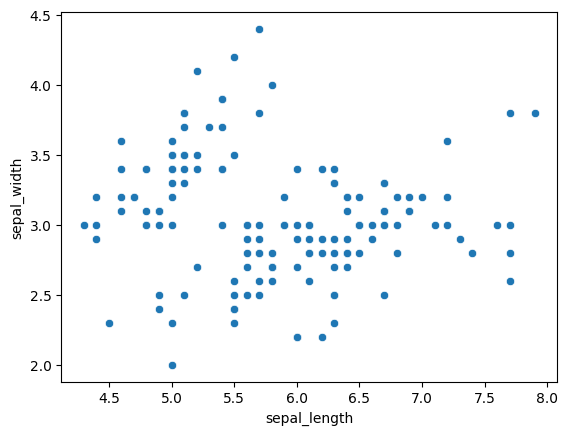

In [98]:
sns.scatterplot(x='sepal_length', y='sepal_width', data=df)

In [99]:
from sklearn.metrics import confusion_matrix

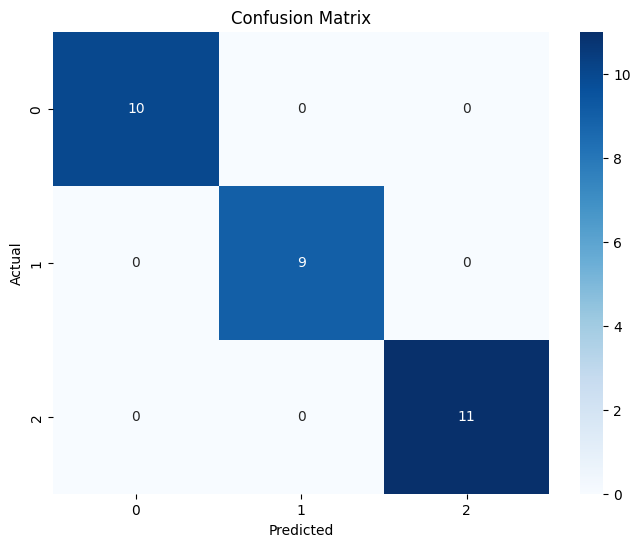

In [101]:
# prompt: generate a confusion matrix

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming rf_y_pred and y_test are defined from your previous code
cm = confusion_matrix(y_test, rf_y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=le.classes_, yticklabels=le.classes_) # Use le.classes_ for labels
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()